In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib
matplotlib.rcParams["font.size"] = 16

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=["sep-len", "sep-wid", "pet-len", "pet-wid", "class"])
df.head()

,sep-len,sep-wid,pet-len,pet-wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
def get_cdf(col):
    cdf = pd.DataFrame()
    cdf["size"] = df[col].sort_values()
    cdf.reset_index(inplace=True)
    cdf["percentile"] = (cdf.index + 1) * 100 / len(cdf)
    return cdf

Text(0, 0.5, 'Percent of Irises')

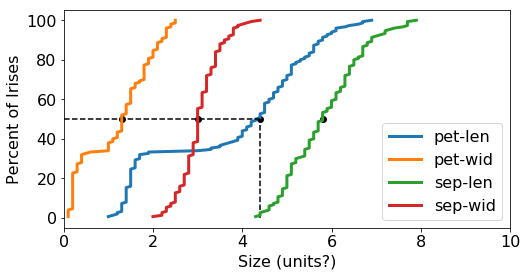

In [63]:
ax = None
for col in ("pet-len", "pet-wid", "sep-len", "sep-wid"):
    cdf = get_cdf(col)
    ax = cdf.plot.line(x="size", y="percentile", label=col, ax=ax, lw=3, xlim=(0,10), figsize=(8,4))
    
    mid = cdf["size"].iloc[len(cdf) // 2]
    ax.scatter(mid, 50, s=35, c="black")
    if col == "pet-len":
        ax.plot([0, mid], [50, 50], 'k--')
        ax.plot([mid, mid], [0, 50], 'k--')

ax.set_xlabel("Size (units?)")
ax.set_ylabel("Percent of Irises")